<h1 style="font-size:300%">Wine categorizer</h1>

This notebook is designed as a first stepping stone into machine learning using the Nearest Neighbors technique (k-NN) of the scikit-learn package. 

Hans Konings, 2026

![Wine](BANNER.jpeg)


Wines exist in several cultivars, like Chenin Blanc or Cabernet Sauvignon. A wine expert can easily tell the difference between the cultivars, but is a machine capable of that as well with the given data?

# 📒 Domain Understanding & Analytic approach

In the first phase the goal, approach and requirements will be determined to set-up the groundwork for developing the AI solution (if possible).

### 🌍 Domain understanding 

To let a machine determine the cultivar of a wine, one first needs to know what factors contribute to a cultivar. 
Additionally, what could be the added value of an AI determining the cultivar of a wine? And could such a model be misused? 
- Possible stakeholders for such a case would be wine factories, individual who personally produce wine, small wine businesses, distributors.
- The model however can also be misused as an Ai model cannot be 100% correct, meaning that if people use it in labs for validity, at some point it will give a wrong prediction.
- The added value of such a model can be: faster wine identification, cost reductions, consistency.

### 🏹 Analytic approach

The cultivar of a wine (like Cabernet Sauvignon) is a category, making this project a [classification problem](https://www.geeksforgeeks.org/machine-learning/getting-started-with-classification/).

### 📋 Data requirements

The first step Data Requirements is mainly about what information is necessary to realise or support the goal of your project (what are you trying to predict or analyse?).


# 🧮 Data design

At the root of data design the data sourcing steps is meant to see if there is a suitable data source for the AI-project. This source is considered to contain, generate or stream the data needed to predict the target variable, using one or multiple machine learning algorithms/models. 

In this case, the source is already known and provided, but it is still advised to assess the origin of the data. Often, additional information about the dataset is provided. In this case you can find more information on the website of the UCI (University of California, Irvine) and in the Data Set Description file 'wines.names' (text file).

In [19]:
#often no actual actions in Python are required in this step... 
#first set the requirements before collect/find the data...

A starting point to defining required data elements is to look at the target variable. Does  this variable have specific units, measures, ranges, ...? In this case, the author states in the description that these data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. This is shown in the data in the first column (class) containing either value 1, 2 or 3. That means the data is labeled, something that is required for the choosen classification model. 

Besides the label, we need other characteristics of wines for classifying. I know wine contains alcohol, but in this case there is no need to think about more detailed and specific features, as there is a nice list of variables, as a result of the chemical analysis.



### 🗒️ Data dictionary

A list of features is provided, but it contains a lot of chemical or domain-specific terms. All this data resulted from a chemical analysis done on the wines grown in the same region of Italy, but are derived from 3 different cultivars (a plant variety that has been produced in cultivation by selective breeding). It is also the case this this datset probably had 30 instead 13 variables to begin with, but for some unknown reason 17 where lost, according to the creator of this dataset.

Additionally, I have added some explanation on the meaning of the variables.

(0) cultivar: There are 3 different grape cultivars.

(1) Alcohol - The average glass of wine contains about 11 percent to 13 percent alcohol, but bottles range from as little as 5.5 percent ABV to as much as around 20 percent ABV (source: https://www.realsimple.com/holidays-entertaining/entertaining/food-drink/alcohol-content-wine)

(2) Malic acid: It is a kind of acid with strong acidity and apple aroma. The red wine is naturally accompanied by malic acid. 

(3) Ash: The essence of ash is an inorganic salt, which has an effect on the overall flavor of the wine and can give the wine a fresh feeling. 

(4) Alkalinity of ash: It is a measure of weak alkalinity dissolved in water.

(5) Magnesium: It is an essential element of the human body, which can promote energy metabolism and is weakly alkaline.

(6) Total phenols: molecules containing polyphenolic substances, which have a bitter taste and affect the taste, color and taste of the wine, and belong to the nutrients in the wine.

(7) Flavanoids: It is a beneficial antioxidant for the heart and anti-aging, rich in aroma and bitter.

(8) Nonflavanoid phenols: It is a special aromatic gas with oxidation resistance and is weakly acidic. 

(9) Proanthocyanins: It is a bioflavonoid compound, which is also a natural antioxidant with a slight bitter smell. 

(10) Color intensity: refers to the degree of color shade. It is used to measure the style of wine to be “light” or “thick”. The color intensity is high, meanwhile the longer the wine and grape juice are in contact during the wine making process, the thicker the taste.

(11) Hue: refers to the vividness of the color and the degree of warmth and coldness. It can be used to measure the variety and age of the wine. Red wines with higher ages will have a yellow hue and increased transparency. Color intensity and hue are important indicators for evaluating the quality of a wine's appearance.

(12) OD280/OD315 of diluted wines: This is a method for determining the protein concentration, which can determine the protein content of various wines.

(13) Proline: It is the main amino acid in red wine and an important part of the nutrition and flavor of wine.

Often a dataset is already provided, but one should look beyond the given data and features. Data requirements can also address data elements that are not part of a given dataset. 
In this case, as I'm no expert on wines, the data is entirely numerical, so my additional requirements  would be that these wines would also have a name/title, names of grape(s) used, or other readable notes, so it is a little bit easier to understand what we're talking about.  Furthermore, I don't know how accurate or old this data is, the chemical analysis might performed on a very outdated machine, or maybe it's results are not even real (plainly generatated). These can also be requirements (although we know it will not going to be in the data, as the dataset is already given and very limited). 


### 🗳️ Data Collection

This data is available at the site of UCI Machine Learning Repository: https://archive.ics.uci.edu/dataset/109/wine. I have downloaded the dataset as a csv file. 

In [20]:
#Import libraries
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


Read the data. Know that there are many useful parameter to improve/optimize the way the data is being read into a dataframe. You can define the delimiter or decimal character, to get correct data values.

In [21]:
df = pd.read_csv("wine.csv", sep=',')
df.sample(10)

,cultivar,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,proline
154,Verdicchio,12.58,1.29,2.10,20.0,103,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640
16,Sangiovese,14.30,1.92,2.72,20.0,120,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280
7,Sangiovese,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
177,Verdicchio,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560
117,Dolcetto,12.42,1.61,2.19,22.5,108,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345
172,Verdicchio,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660
100,Dolcetto,12.08,2.08,1.70,17.5,97,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710
121,Dolcetto,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
165,Verdicchio,13.73,4.36,2.26,22.5,88,1.28,0.47,0.52,1.15,6.62,0.78,1.75,520
130,Verdicchio,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630


The dataset is not likely to change, so I will keep not a version or change record. 

### 📊 Exploratory Data Analysis

We start by looking at some general statistics of the features. In this case all values are numerical, in order to get statistics on categorical data, you need to add the 'include' parameter.

In [22]:
df.describe()

,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


We can start with checking (scanning) the general features of the dataset. There are 177 lines of data, and each feature has its specific characteristics. 

As a first attempt to improve the data requirements, I have tried to add units and ranges to the data definition. It can also help to check the consistency and validity of the data.

(0) cultivar: in this case, there are 3 cultivars. 

(1) Alcohol - in the dataset everything is between 11 and 15. which falls in the unfortified wines category of the ABV.

(2) Malic acid: Ranges between 0,74 and 5,8. After a bit of research on malic acid in wines, the common range appears to be 0-8 (according to https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity).

(3) Ash: It normally lays between 1.3 and 3.5 and in our data it does as well [1,36-3,23] (source: https://www.institut-heidger.de/ash-gravimetric-calculated-from-minerals-alkalinity-of-ash/?lang=en)

(4) Alkalinity of ash: Our data ranged from 10.6 to 30. The alkalinity of ash is expressed in milliequivalents per litre or in grams per litre of potassium carbonate (source: https://www.institut-heidger.de/ash-gravimetric-calculated-from-minerals-alkalinity-of-ash/?lang=en).

(5) Magnesium: Typically these values range between 50-200 and in this case it is between 70 and 162.

(6) Total phenols: Our data ranges from 0.98 to 3.88.

(7) Flavanoids: Our data ranges from 0.34 to 5.08,

(8) Nonflavanoid phenols: Our data ranges from 0.13 to 0.66.

(9) Proanthocyanins: Our data ranges from 0.41 to 3.58

(10) Color intensity: Our data ranges from 1.28 to 13

(11) Hue: Our data ranges from 0.48 to 1.71

(12) Our data ranges from 1.27 to 4

(13) Proline: Our data ranges from 278 to 1680

In [23]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cultivar                      178 non-null    str    
 1   alcohol                       178 non-null    float64
 2   malic acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity of ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  proline         

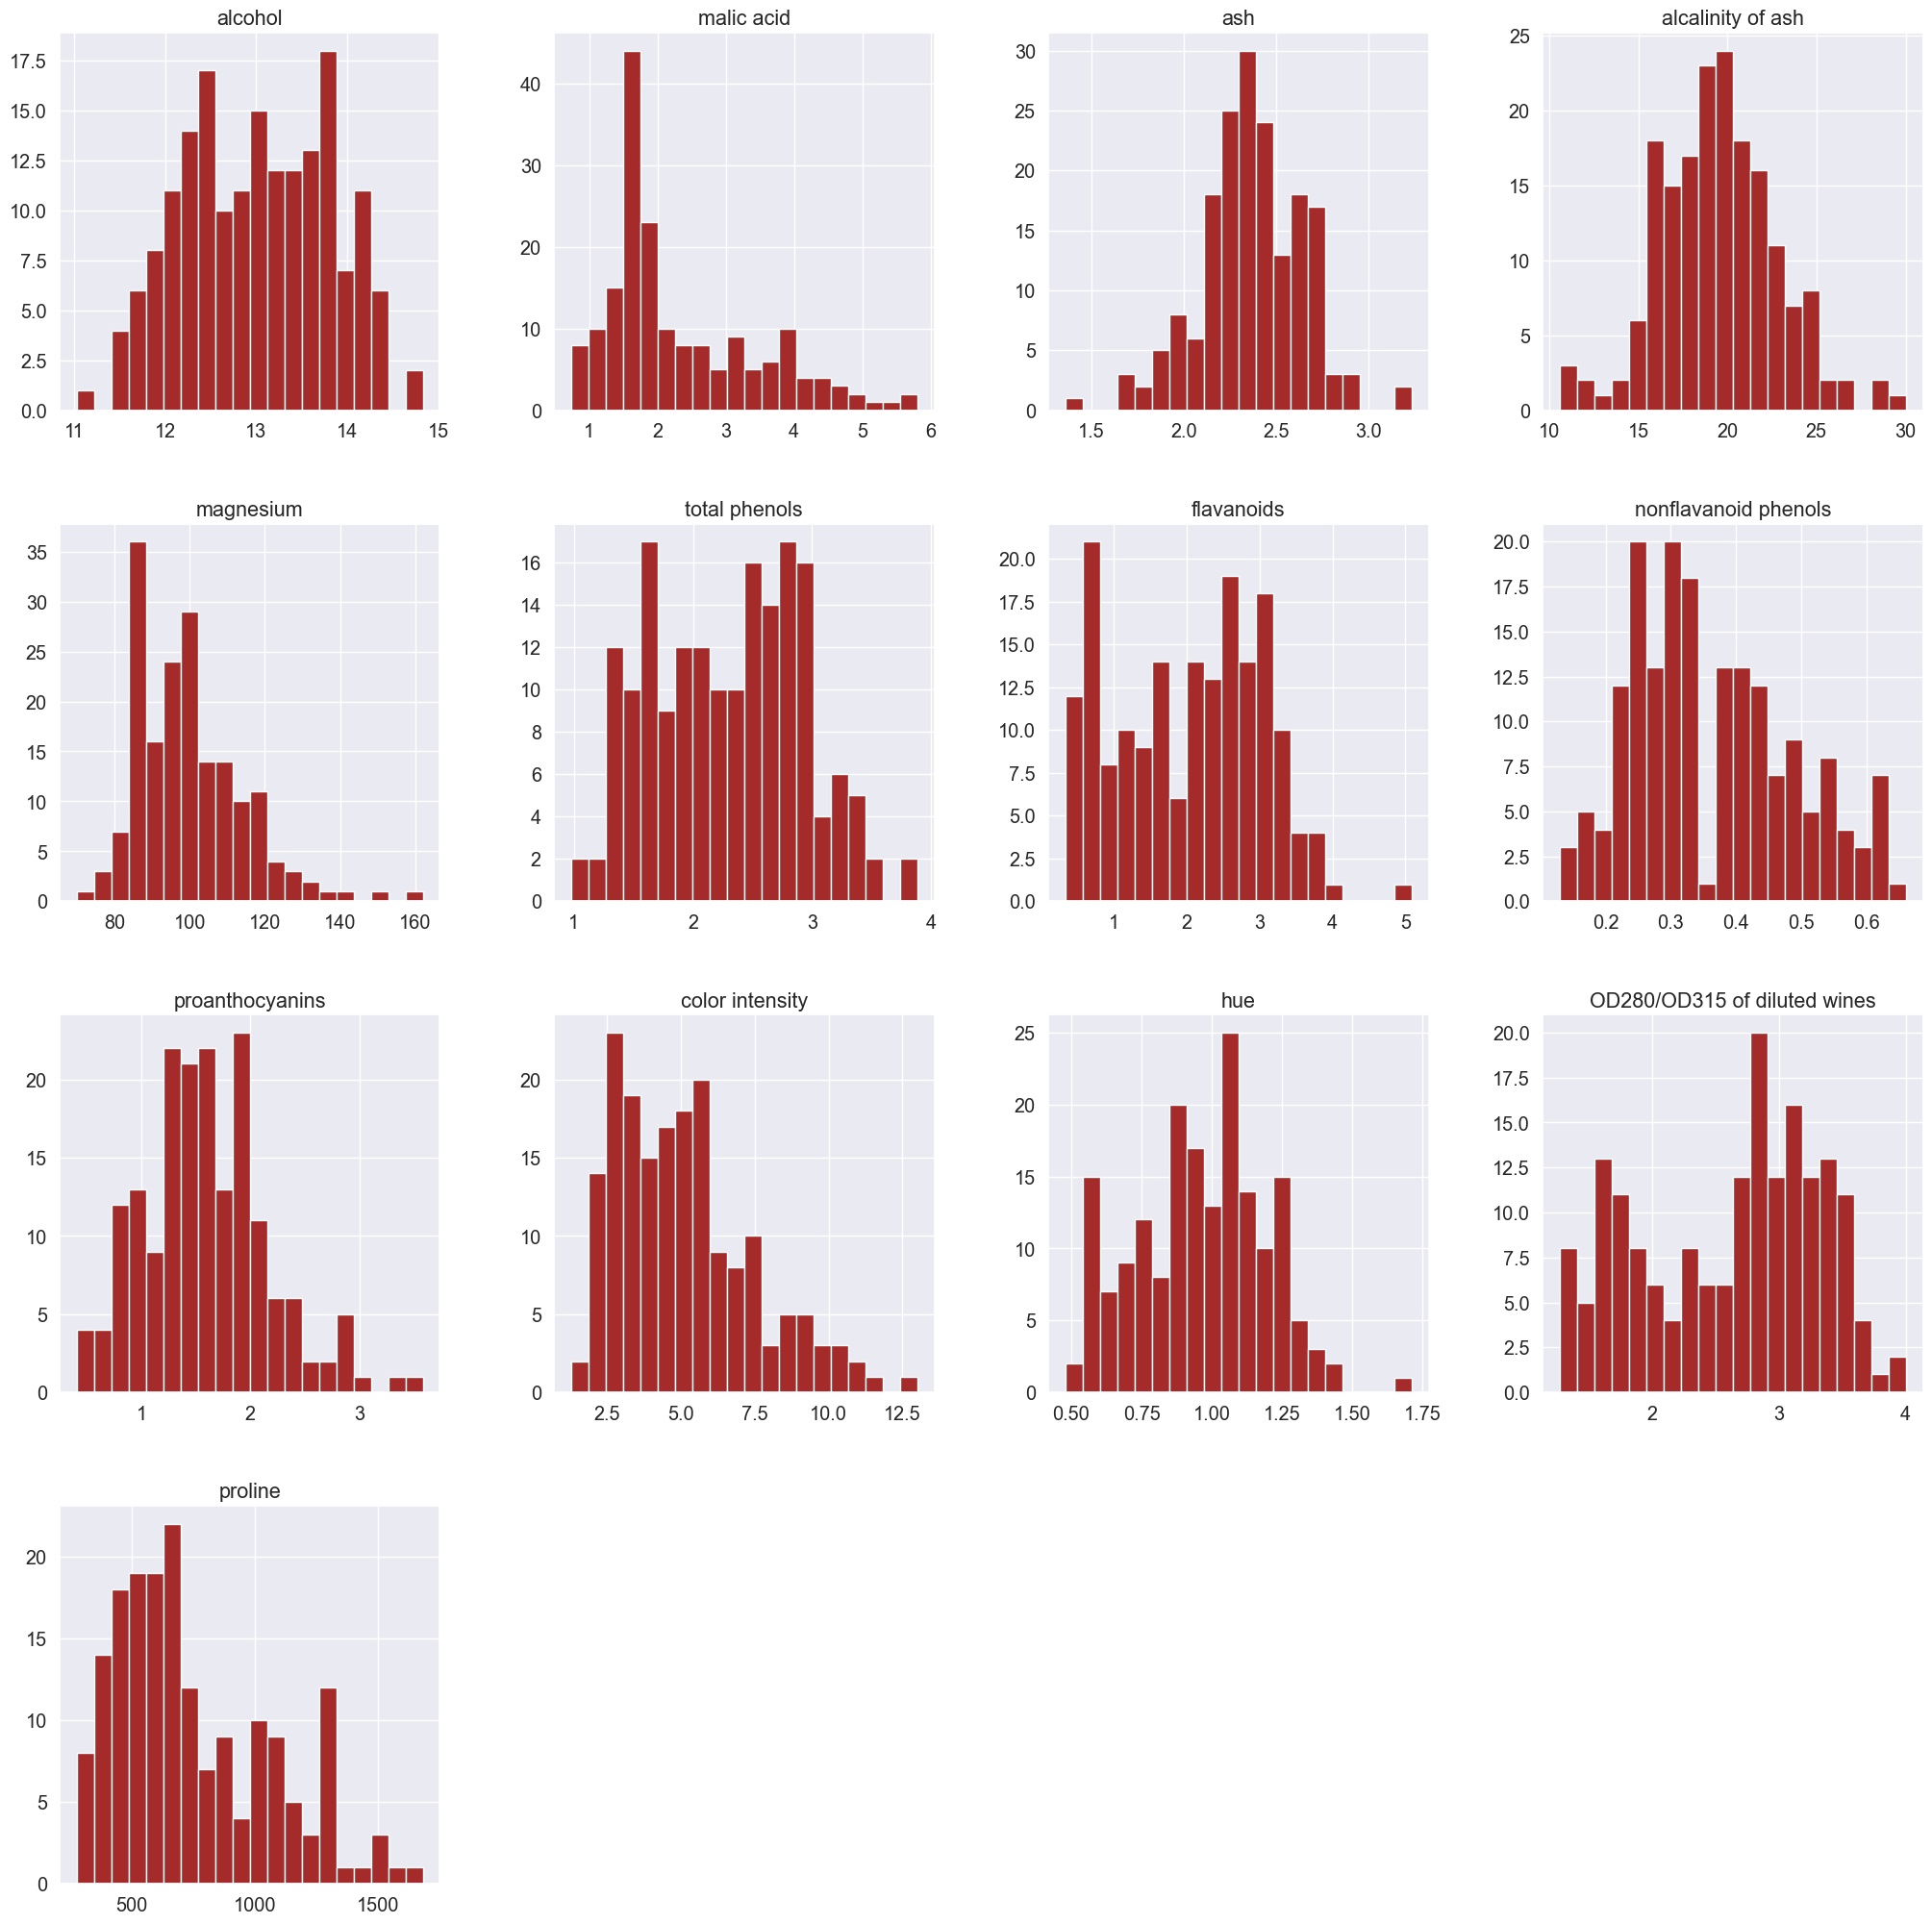

In [24]:
sns.set(style='darkgrid',font_scale=1.3, rc={'figure.figsize':(25,25)})
ax=df.hist(bins=20,color='brown')

# Encoding the label
Because machine learning models use numeric values as input and then produce a numeric value as output, we need to encode the cultivar target variable as a number. To this end a Label Encoder exists that can read a specified categorical column and provide matching numbers.

In [25]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
df["class"] = encoder.fit_transform(df["cultivar"])
df.drop("cultivar", axis=1, inplace=True)
df.sample(10)

,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,proline,class
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312,0
92,12.69,1.53,2.26,20.7,80,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495,0
57,13.29,1.97,2.68,16.8,102,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270,1
169,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630,2
104,12.51,1.73,1.98,20.5,85,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672,0
31,13.58,1.66,2.36,19.1,106,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515,1
131,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530,2
97,12.29,1.41,1.98,16.0,85,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428,0
137,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515,2
98,12.37,1.07,2.10,18.5,88,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660,0


Notice that at the end of our dataset a new column named `class` is created, which becomes the target variable for the machine learning algorithm, and the column `cultivar` has been removed. The Label Encoder can be used to convert the numeric representation back to the original cultivar name.

In [26]:
name = encoder.classes_[1]
name2 = encoder.classes_[2]
name3 = encoder.classes_[0]

name, name2, name3

('Sangiovese', 'Verdicchio', 'Dolcetto')

### 🛠️ Data Preparation

In this notebook we will keep this section very limited. The data is numerical, which makes it suitable as input to train the kNN model. Missing or corrupt values might cause issues in the modelling phase, so we'll (quickly) check this:

In [27]:
df.isnull().sum()

alcohol                         0
malic acid                      0
ash                             0
alcalinity of ash               0
magnesium                       0
total phenols                   0
flavanoids                      0
nonflavanoid phenols            0
proanthocyanins                 0
color intensity                 0
hue                             0
OD280/OD315 of diluted wines    0
proline                         0
class                           0
dtype: int64

There are no null values in the data. In the EDA section we have already looked for odd or incorrect values, such as negative or extreme values. So in short, I conclude the data is okay to use for modelling and we can proceed to the next phase (3). 

# 🧩 Modelling & evaluation


 

### 💡 Feature selection
Perhaps the most important step is 'feature selection', which is the activity of deciding which of the candidate features to use in order to predict the target variable. A common mistake is to just take all features "because knowing more, implies a higher chance of guessing correct", which is not true. Sometimes some features do not help at all, and some even produce noise in the algorithm. It is therefore important to pick only those features that can together explain the variance in the target variable the best. For a classification algorithm that would mean that any feature that has well distinguishable values per class would be good. A way to look for this is by creating a [box plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html).

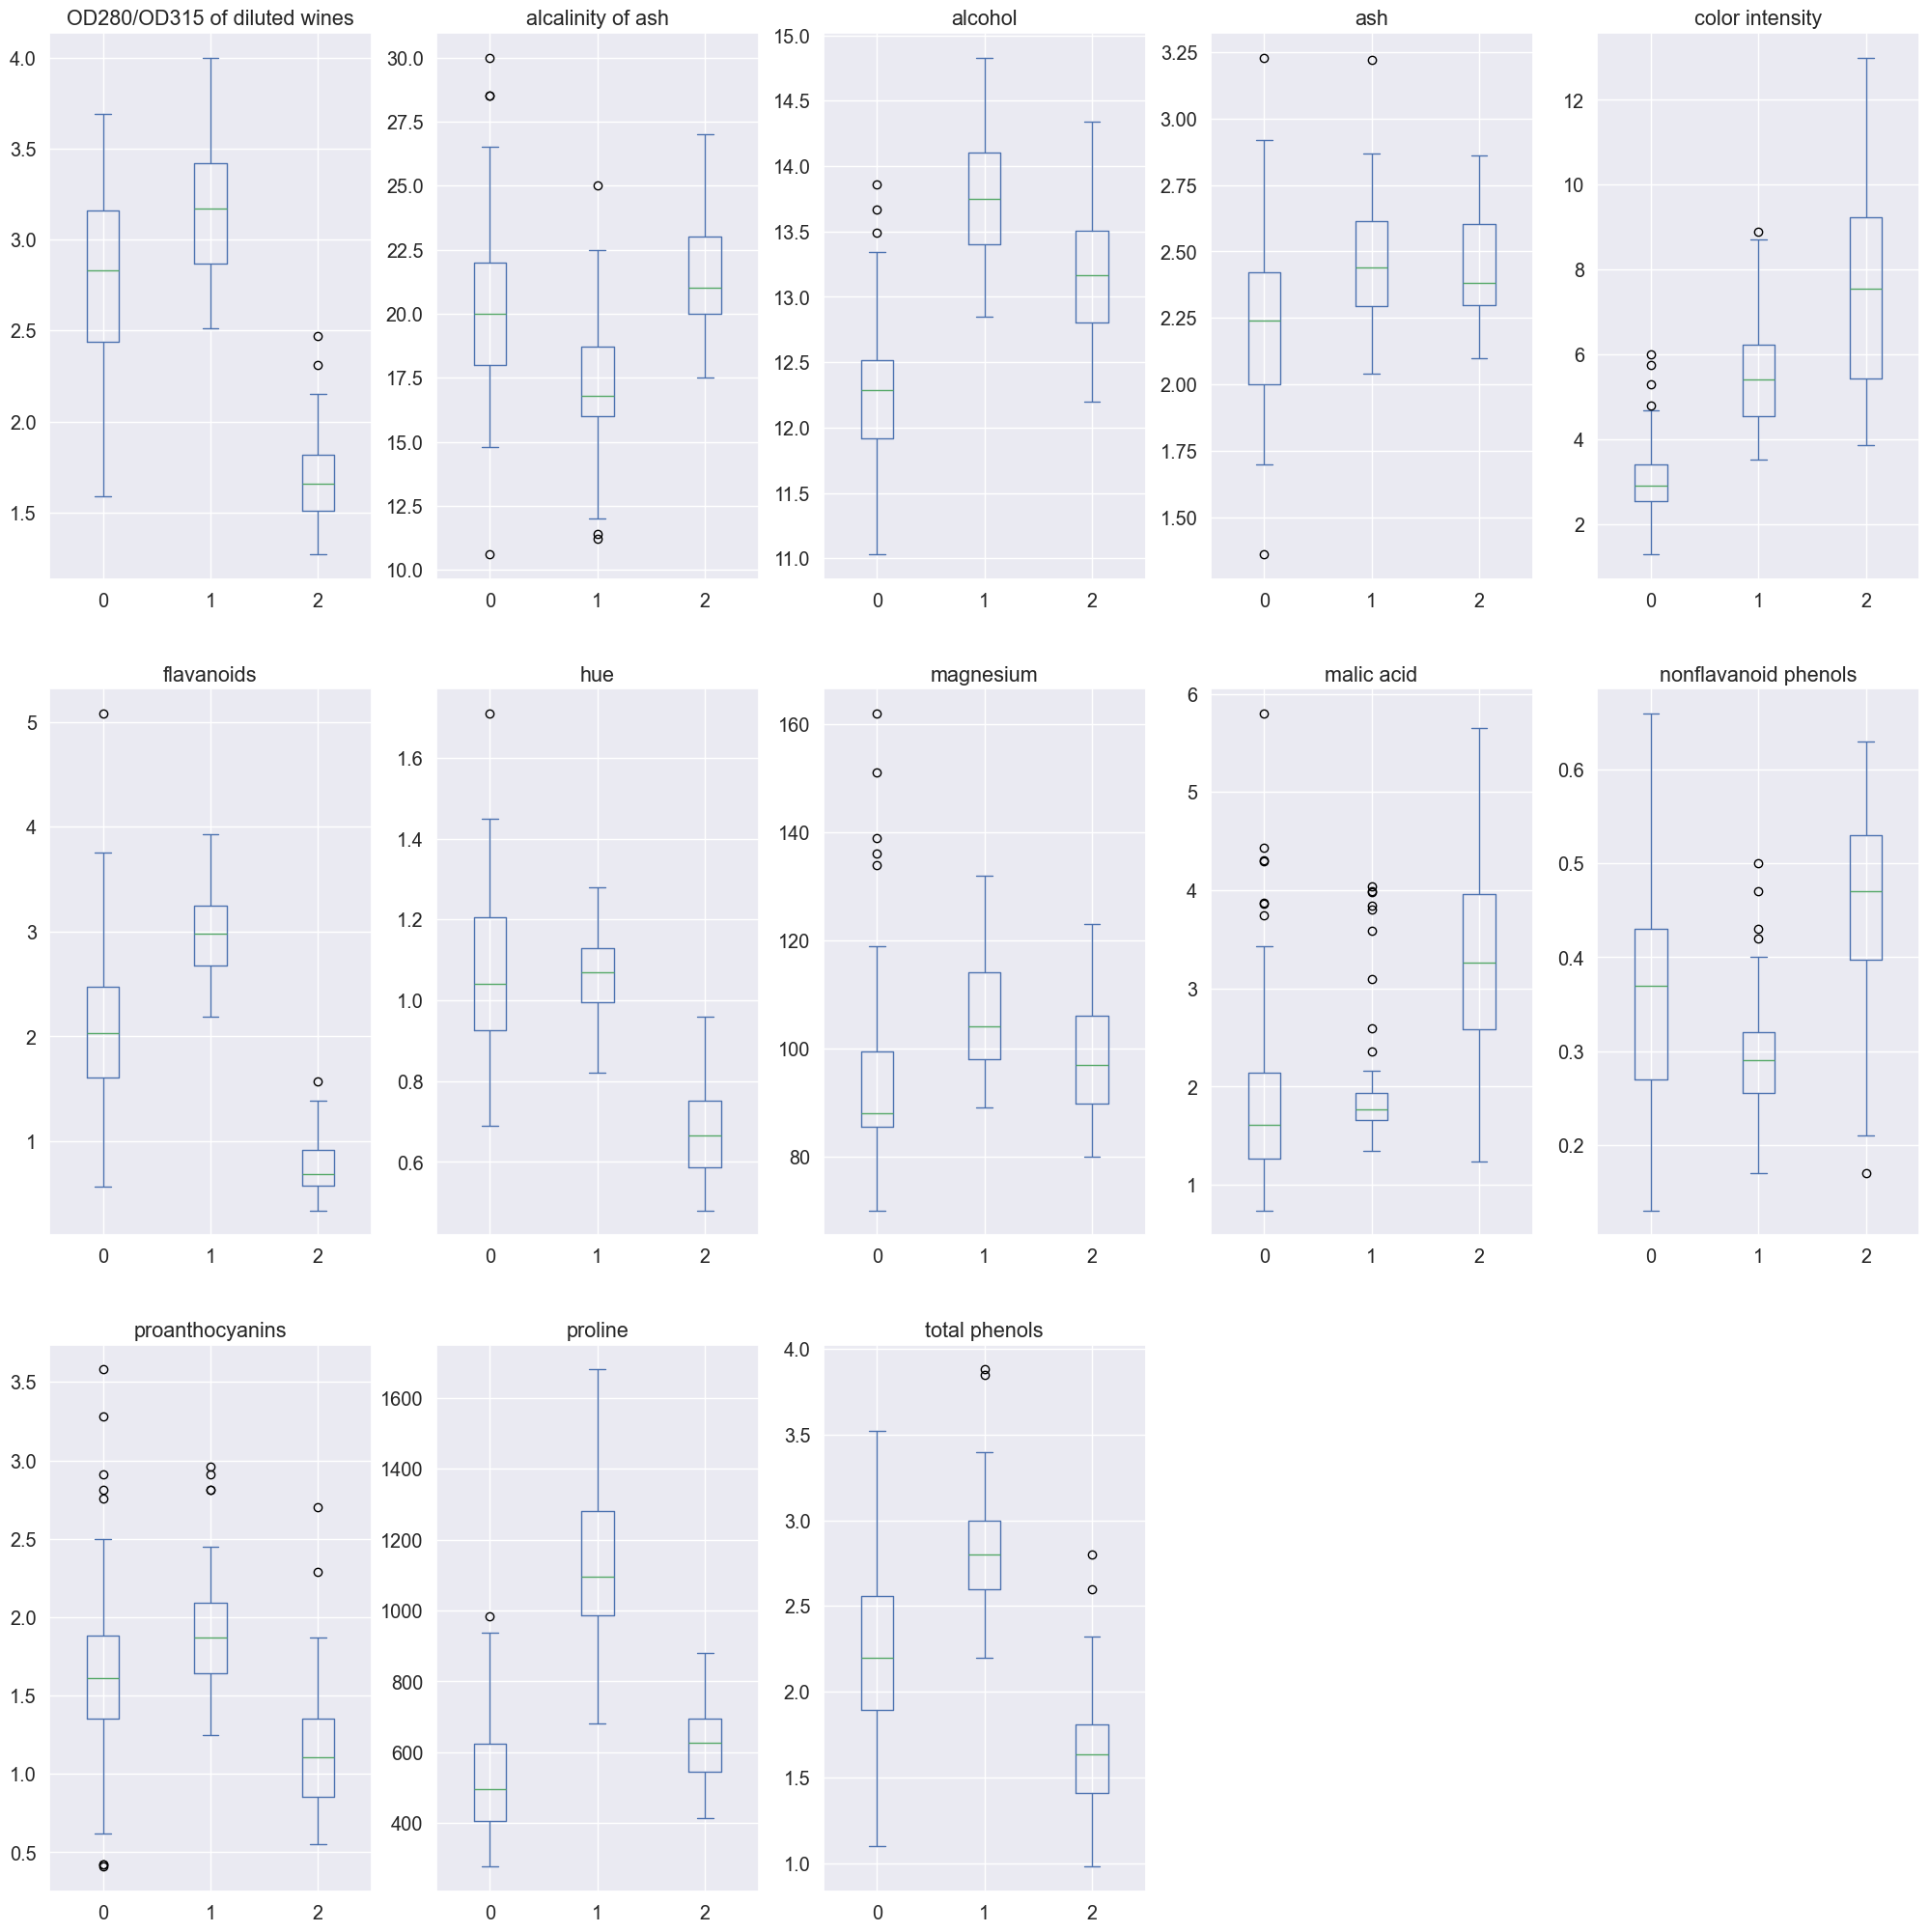

In [28]:
plot = df.plot(kind="box", subplots=True, sharey=False, layout=(3,5), column=list(df.columns[:-1]), by="class")

The idea here is that we eliminate those features in which the boxes exhibit large vertical overlap, for example the features `ash`, `alcalinity of ash` and to a lower extend `magnesium` seem to have this. Or, where the top and bottom bars are so long, that they take up the whole range of values and greatly overlap with the other classes, for example the feature `nonflavanoid phenols` seems to exhibit this, and to some extend the feature `proline` too.

In [29]:
features = list(df.columns[:-1])
features.remove("ash")
features.remove("alcalinity of ash")
features.remove("magnesium")
features.remove("nonflavanoid phenols")
features.remove("proline")
features.remove("hue")
features.remove("malic acid")
features.remove("OD280/OD315 of diluted wines")

#removed hue, malic acid and OD280/OD315
target = "class"
X = df[features]
y = df[target]

### 🪓 Splitting into train/test
Before the model can be trained, a little part of the data is to be put aside for testing purposes. The reasoning here is that the model trains with, for example 80% of the data available, and the other 20% is used to ask it to predict the target variable for. Now, because the true target variable of that 20% is known, we can compare the predictions us with the ground truth and devise how well the model performs.

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 178 observations, of which 142 are now in the train set, and 36 in the test set.


### ⚖️ Scaling
The Nearest Neighbors algorithm uses the concept of "being near" as to decide which species an unknown iris would be. This "being near" is calculated using [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance), which is an absolute measurement between two values of the same feature, but not among features. It is therefore needed to scale all the features such that they use the same unit of measurement. Here is an example that demonstrates why:
> Given the numbers 6 and 8, the Euclidean distance would be 2. Given the numbers 95 and 100 the Euclidean distance would be 5. However, 95 and 100 are in fact closer to each other (95%) than 6 and 8 are (75%).

Therefore it is important that among features the same unit is used. A common unit to use is [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation), and sklearn provides the `StandardScaler` to transform all values into that same unit. Note that the distance is in standard deviations (σ).

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 🧬 Modelling
In this step only the train set is used to fit the model, which in this case uses a Nearest Neighbors algorithm for classification named [kNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). And after that the test set is used to calculate the model's accuracy, in other words how well it performs. Accuracy is a fraction where any value closer to 1 is considered better, and 1 itself (100% accurate) is usually impossible.

Finding the best value for K, using the Elbow method to test multiple different values and their error rate. Source: https://www.geeksforgeeks.org/machine-learning/how-to-find-the-optimal-value-of-k-in-knn/

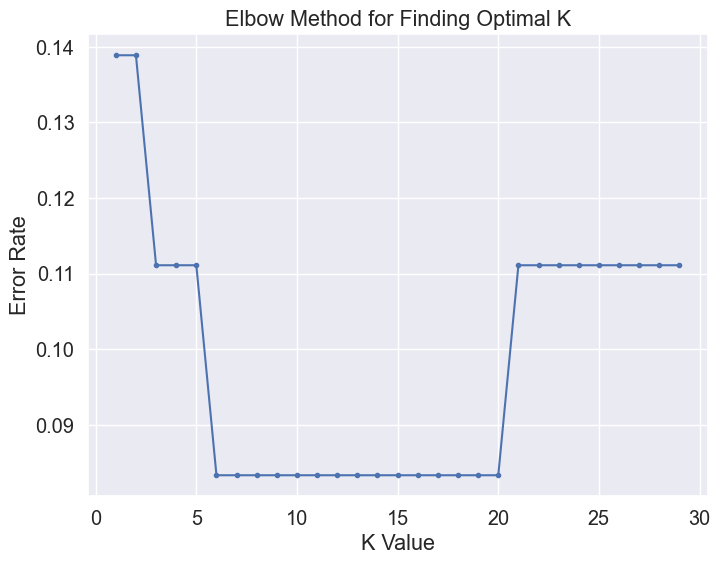

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = range(1, 30)
error_rates = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error_rate)

plt.figure(figsize=(8, 6))
plt.plot(k_values, error_rates, marker='.')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Finding Optimal K')
plt.show()


Cross-Validation for KNN

We use cross-validation with cv=20 (20-fold cross-validation). For each value of K in the range 1 to 50, the training data is split into 20 folds. The model is trained 20 times: each time it trains on 19 folds and is evaluated on the remaining fold. We then take the average accuracy across the 20 folds for that K. After testing all K values, we select the K with the highest average cross-validation accuracy. Finally, we train a KNN model using this best K and evaluate its accuracy on a separate test set.

For k = 1 - train/evaluate 20 folds (20 fits)

For k = 2 - train/evaluate 20 folds

For k = 3 - train/evaluate 20 folds

In [33]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 50)}

grid_search = GridSearchCV(knn, param_grid, cv=20)
grid_search.fit(X_train, y_train)

optimal_k = grid_search.best_params_['n_neighbors']
print(f"The optimal K value is: {optimal_k}")

The optimal K value is: 4


In [34]:
model = KNeighborsClassifier(n_neighbors=optimal_k)
model.fit(X_train, y_train)
pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(pred, y_test)
print("Accuracy:", score)

Accuracy: 0.8888888888888888


### 🔬 Evaluation
In order to shed some light on the results a classification report can be printed. This shows for every one of the classes how well the model performed.

In [35]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pred, target_names=encoder.classes_)
print(report)

              precision    recall  f1-score   support

    Dolcetto       1.00      0.78      0.88        18
  Sangiovese       0.79      1.00      0.88        11
  Verdicchio       0.88      1.00      0.93         7

    accuracy                           0.89        36
   macro avg       0.89      0.93      0.90        36
weighted avg       0.91      0.89      0.89        36



### 🔎 Inference example

Now that the model is trained for predicting iris species based on a given petal length and petal width, it can now be used to inference a class for a new observation. This means that for any given combination of petal length and petal width it can give a probability of how likely that combination indicates the classes that the model knows. Feel free to change the values for `petal_length` and `petal_width` below to get another prediction. Note that the values provided are in cm, but the model was trained on standard deviations. Therefore the same scaler is used again to transform the given values into standard deviations before feeding the values to the model.

In [36]:
inference_data = pd.DataFrame([{
    'alcohol' : 14.1,
    # 'malic acid' : 1.8,
    'total phenols' : 3.3,
    'flavanoids' : 2.9,
    'proanthocyanins' : 1.92,
    'color intensity' : 3.35,
    # 'hue' : 1.3,
    # 'OD280/OD315 of diluted wines' : 3.4,
    }])
inference_data = scaler.transform(inference_data)

prediction = model.predict_proba(inference_data)
result = pd.DataFrame()
result["class"] = encoder.classes_
result["Probability"] = prediction[0]
result

,class,Probability
0,Dolcetto,0.0
1,Sangiovese,1.0
2,Verdicchio,0.0
